In [15]:
import scipy.integrate as integrate
import scipy.optimize as optimize
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Examen 3

##1) 
Determine el espacio de configuraciones: es decir, con todas las condiciones iniciales posibles, en los ejes $(x,v)$, del movimiento horizontal con fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$. $x$ es la posicion y $v$ velocidad. 

Planteamiento teorico:  
$$ m\frac{d^2x}{dt^2} + b\frac{dx}{dt} + kx = 0 $$
\
 $$ \frac{dv}{dt} + \frac{b}{m}v + \frac{k}{m}x = 0 $$
\
\begin{align}
    \frac{dW}{dt} &= \begin{bmatrix} \frac{dx}{dt}  \\ \frac{dv}{dt}  \\ \end {bmatrix} =
     \begin{bmatrix} v \\ a \end{bmatrix} = \begin{bmatrix} v \\ -\frac{b}{m}v-\frac{k}{m}x \end{bmatrix}
\end{align} 

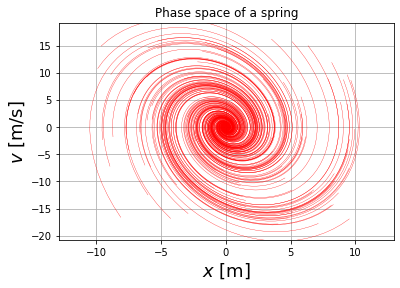

In [57]:
def uno(W,t):
    x,v= W
    m = 0.2 # kg
    b = 0.2 # madera-madera
    k = 1 # N/m
    a = -(b/m)*v-(k/m)*x
    l = [v,a]
    return l

Nic = 100
x0s = np.random.uniform(-10,10,Nic)
v0s = np.random.uniform(-18,18,Nic)
tmax = 14

for x0, v0 in zip(x0s, v0s):
    t=np.linspace(0,tmax,400)
    y0=[x0,v0]
    y=integrate.odeint(uno,y0,t)
    x=y[:,0]
    v=y[:,1]
    plt.plot(x,v,lw = 0.3, color = "red")    
#Format of figure
plt.xlabel( "$x$ [m]", fontsize = 18 )
plt.ylabel( "$v$ [m/s]", fontsize = 18 )
plt.xlim( (x0s.min()-3,x0s.max()+3) )
plt.ylim( (v0s.min()-3, v0s.max()+3) )
plt.title( "Phase space of a spring" )
plt.grid(1)

##  2) 
Considere una muestra de Strontium-90, ${}^{90}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-λa t}\,,\qquad λa=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $λa$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

###(a) 
Realice un fit a los datos y determine la vida media con su respectivo error.

In [61]:
datos=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

def N(t,λ):
    N0 = 1000 # partículas en t = 0
    return N0*np.e**(-t*λ)

λA,λEr = optimize.curve_fit(N,datos['t'], datos['N(t)'])
λ = λA[0]
deltaλ = np.sqrt(λEr[0][0])

Vmean = np.log(2)/λ
deltaVmean = deltaλ*np.log(2)/(λ**2)

print(f'Vida media = {Vmean:.2f} ± {deltaVmean:.2f} años')

Vida media = 27.99 ± 0.41 años


### (b) 
Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

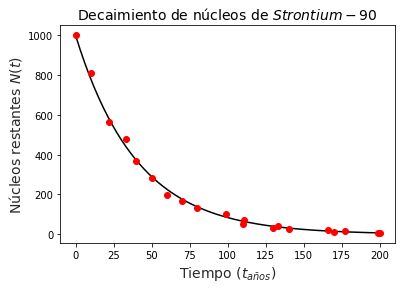

In [54]:
t= np.linspace(0,200,200)
plt.title('Decaimiento de núcleos de $Strontium-90$', size = 14, c = 'black')
plt.xlabel('Tiempo $(t_{años})$', size = 14, c = '#2E2828')
plt.ylabel('Núcleos restantes $N(t)$', size = 14, c = '#2E2828')
plt.plot(t, N(t,λ), c = 'black')
plt.plot(datos.t, datos['N(t)'], 'o', c = 'red')
plt.show()